<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="# Case 2 - Pneumonia X-ray Image Analysis" data-toc-modified-id="Case-X.-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 2 - Pneumonia X-ray Image Analysis</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Modes-and-training" data-toc-modified-id="Modes-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modes and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 2 - Pneumonia X-ray Image Analysis
Samuel Räsänen, Arttu Sundell, Jari Putaansuu<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>
01.03.2020<br>

# Background

Introduction
Pneumonia is an infection, caused by bacteria, viruses and fungi, that inflames the air sacs. During the inflames air sacs (in one or both lungs) may be fill with fluid. This may cause fever, breath difficulties, pus or phlegm (which causes cough). 
[1][2]
In this exercise we studied the usage of the CNN (convolutional neural network) to classify medical images by having pneumonia or not using the dataset [3]
We compared 3 different CNN models to find the most accurate one.

1.	Everything you need to know about pneumonia. Internet source. Healthline.com <https://www.healthline.com/health/pneumonia>. 1.3.2020.
2.	Pneumonia. Internet source. Mayo clinic. <https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204>. 1.3.2020.
3.	https://data.mendeley.com/datasets/rscbjbr9sj/2. Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data


# Tools

In [1]:
%pylab inline
import numpy as np #linear algebra
import os #operatin system commands
import shutil #high-level operating for files (for copying contents)
import random #random generator
from tensorflow import keras #keras neural network library
from tensorflow.keras import layers, models, optimizers #keras tools needed
from keras.layers import BatchNormalization, Dropout, Flatten, Activation,Conv2D, MaxPooling2D #CNN layers used 
from tensorflow.keras.preprocessing.image import ImageDataGenerator #image preprocessor for CNN
from tensorflow.keras.metrics import FalseNegatives,FalsePositives, SpecificityAtSensitivity #metrics used in model performance evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve #metrics used in final network performance evaluation

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# Data and preparation
The dataset used is a publicly available dataset called ChestXray2017 [1] consisting of 5852 pediatric x-ray images of the chest area. The dataset contains pictures of lungs labeled as normal or pneumonia. The pneumonia might be either of bacterial or viral origin. Pictures are taken from the front (anterior) or back side (posterior). The original dataset consists of 2 folders "train" and "test" each with subfolders "NORMAL" and "PNEUMONIA" categorizing the images. We merged test and train folders to form a pool dataset which was shuffled and then split in proportion to 60:20:20 (training:validation:test). Images were also randomly rotated, flipped and shaped for better recognition of pneumonia.
1. https://data.mendeley.com/datasets/rscbjbr9sj/2. Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data

In [2]:
# importing dataset

norm_dir1 = "/kaggle/input/chestxray2017/chest_xray/train/NORMAL"
norm_dir2 = "/kaggle/input/chestxray2017/chest_xray/test/NORMAL"

sick_dir1 = "/kaggle/input/chestxray2017/chest_xray/train/PNEUMONIA"
sick_dir2 = "/kaggle/input/chestxray2017/chest_xray/test/PNEUMONIA"


In [3]:
# creating a pool directory and all the data subset directories
pool_dir = './pool'
testset = './test'
trainset = './train'
valset = './val'


allnewdirs=[pool_dir,trainset,valset, testset] 
# creating directories described above and creating NORMAL and PNEUMONIA subfolders for each new directory
try:
    for d in allnewdirs:
        os.mkdir(d)
        os.mkdir(os.path.join(d, 'NORMAL'))
        os.mkdir(os.path.join(d, 'PNEUMONIA'))
except:
    pass

In [4]:
# list the filenames of normal images used for copying
normal_images1=[n for n in os.listdir(norm_dir1) if n.endswith(".jpeg")]
normal_images2=[n for n in os.listdir(norm_dir2) if n.endswith(".jpeg")]
no_normal_images1=len(normal_images1)
no_normal_images2=len(normal_images2)

# list the filenames of pneumonia images used for copying
pneumonia_images1 = [n for n in os.listdir(sick_dir1) if n.endswith(".jpeg")]
pneumonia_images2 = [n for n in os.listdir(sick_dir2) if n.endswith(".jpeg")]
no_pneumonia_images1=len(pneumonia_images1)
no_pneumonia_images2=len(pneumonia_images2)

# printing out the indices of normal and pneumonia images
print('total normal images:', no_normal_images1 + no_normal_images2)
print('total pneumonia images:', no_pneumonia_images1 + no_pneumonia_images2)

total normal images: 1583
total pneumonia images: 4273


In [5]:
# making the pool dataset consisting of original train and test images

# copying normal imagesets 1& 2 into pool "NORMAL"
for fname in normal_images1:
    src = os.path.join(norm_dir1, fname)
    dst = os.path.join(pool_dir,'NORMAL', fname)
    shutil.copyfile(src,dst)
    
for fname in normal_images2:
    src = os.path.join(norm_dir2, fname)
    dst = os.path.join(pool_dir,'NORMAL', fname)
    shutil.copyfile(src,dst)
    
 # copying pneumonia imagesets 1& 2 into pool "PNEUMONIA"
for fname in pneumonia_images1:
    src = os.path.join(sick_dir1, fname)
    dst = os.path.join(pool_dir,'PNEUMONIA', fname)
    shutil.copyfile(src,dst)
    
for fname in pneumonia_images2:
    src = os.path.join(sick_dir2, fname)
    dst = os.path.join(pool_dir,'PNEUMONIA', fname)
    shutil.copyfile(src,dst)

In [6]:
# get filenames of normal and pneumonia images and shuffle for a more randomised train val and test set split

# list of normal image filenames in original dataset test and train folders combined
normal_images=normal_images1+normal_images2
# list of pneumonia image filenames in original dataset test and train folders combined
pneumonia_images=pneumonia_images1+pneumonia_images2

# shuffled the list in random order
random.shuffle(normal_images)
random.shuffle(pneumonia_images)

In [7]:
# splitting the pool set for training, validation and test datasets using 60:20:20 ratio
## splitted to similar fractions of normal and pneumonia pictures in all datasets

###Copying images from pool to test set
#Test set (in total of 1000 for reliable metrics)
##Normal images
for fname in normal_images[:300]:
    src = os.path.join(pool_dir,'NORMAL', fname)
    dst = os.path.join(testset,'NORMAL', fname)
    shutil.copyfile(src,dst)
    
##Pneumonia images    
for fname in pneumonia_images[:700]:
    src = os.path.join(pool_dir,'PNEUMONIA', fname)
    dst = os.path.join(testset,'PNEUMONIA', fname)
    shutil.copyfile(src,dst)

#-------------------------------------------------
###Copying images from pool to validation set

##Valset (in total of 1000)
##Normal images
for fname in normal_images[301:601]:
    src = os.path.join(pool_dir,'NORMAL', fname)
    dst = os.path.join(valset,'NORMAL', fname)
    shutil.copyfile(src,dst)

##Pneumonia images    
for fname in pneumonia_images[701:1401]:
    src = os.path.join(pool_dir,'PNEUMONIA', fname)
    dst = os.path.join(valset,'PNEUMONIA', fname)
    shutil.copyfile(src,dst)
#---------------------------------------------------
###Copying images from pool to training set

##Trainset = the rest
##Normal images
for fname in normal_images[602:]:
    src = os.path.join(pool_dir,'NORMAL', fname)
    dst = os.path.join(trainset,'NORMAL', fname)
    shutil.copyfile(src,dst)

##Pneumonia images    
for fname in pneumonia_images[1402:]:
    src = os.path.join(pool_dir,'PNEUMONIA', fname)
    dst = os.path.join(trainset,'PNEUMONIA', fname)
    shutil.copyfile(src,dst)

# Image preprocessing

A convolutuional neural network learns to classify the objects by extracting features that are peresent in the images containing the object. (1) Different kind of images of the target are desirable where the "object" to be recognized appears in varying distances (zoom_level), angles and variances in the surroundings. The dataset at hand contains images that are tkaen pretty much in a standard way. The natural variability lies in wheater the pictures are taken from the front (anterior) or back (posterior) side. In addition the location of the changes related to pneumonia as well as maybe the preferred contrast/ brightness settings may vary. 
To add variability, sort of like make the features harder to learn, or make sure that the classifier focuses on the "right" features, making the model more generizable, some data augmentation should be introduced to the samples in the training set. For example, if by some luck every person in the picture had the chances indicating pneumonia on the left side of their lugns, or on the lower part of their lugns the model might learn that when theres something going on in a specific part of lugns it's pneumonia, and fail to recognize abnormalities in some other parts if it was later introduced to a picture having a change in some previoisly unseen part of lungs. Using augmentation the network should learn to identify the features of the phenomenom indpendently and not tied to a certain location of the image. Usually the augmentation methods include vertical or horizontal shifts, flips, shearing which are generally quite effective. The augmentation methods should always take into account relevancy to the problem to be solved. In medical image analysis, the biases present in the data might be more complex than positional and translational variances (2). 

While investigating some forums and other data sources on popular augmentation methods for medical images (3), the ones mentioned before were found quite common, and therefore applied in our work too. A german group had made a tool for medical image augmentations (4) and we investigated what sort of operations they used, but decided not to implement their code for simplicity. Keras ImageDataGenerator allows the implementation of custom augmentation functions, but we decided to use the built in methods to accomplish augmentation.
In addition to different spatial transformations, we added a random brightnes shift to mimic image brightness variations due to different personal preferences and imaging systems

1. Bonner, Anne 2019. The Complete Beginner’s Guide to Deep Learning: Convolutional Neural Networks and Image Classification. Towards Data Science website. Read. 26.2.2020 Available online at https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb

2. Shorten,Connor; Khoshgoftaar, Taghi.M 2019. A survey on Image Data Augmentation for Deep Learning. Journal of Big Data 6, 60 (2019). Available online at https://www.researchgate.net/publication/334279066_A_survey_on_Image_Data_Augmentation_for_Deep_Learning

3. Bermejo-Peláez, D.; Ash, S.Y.; Washko, G.R.; San Jose Estepar R. & Ledesma-Carbayo,M  2020. Classification of Interstitial Lung Abnormality Patterns with an Ensemble of Deep Convolutional Neural Networks. Sci Rep 10, 338 (2020).Available online at https://www.nature.com/articles/s41598-019-56989-5#Fig2

4. Data augmentation techniques for medical image? -A conversation at ResearchGate forum. Available online at https://www.researchgate.net/post/data_augmentation_techniques_for_medical_image
5. Division of Medical Image Computing at the German Cancer Research Center (DKFZ). Batchgenerators. Available online https://github.com/MIC-DKFZ/batchgenerators


### Note: since the problem is essentially a binary problem (classifying whether a person has pneumonia or not) we generated data to suit binary classification problem instead of a catecorigal problem

In [8]:
## Image and data generation

# generate two Data Generators for data processing

# image generator for training set utilizing image augmentation
traingen = ImageDataGenerator(rescale=1./255, # All images will be rescaled by 1./255
                rotation_range=20, #set random rotational shifts
                width_shift_range=0.2, #set random horisontal shifts
                height_shift_range=0.2, #set random vertical shifts
                shear_range=0.2, #random shearing
                brightness_range= [0.1, 0.4], #randoms brightness shifts
                horizontal_flip=True, #random 
                ) 

#-----------------------------------------------------------------------------------
# image generator for validation and test set without augmentation
devgen = ImageDataGenerator(rescale=1./255) # All images will be rescaled by 1./255


# constant variables used for image generators
TS = (227,227) # Variable for Image Target Size
BS = 16 # Variable for Image Batch Size

# generating batches of tensor image data for training utilizing train generator created above

print('Training set:')
train_generator = traingen.flow_from_directory(
    # this is the target directory
    trainset,
    
    # all images will be resized according to TS
    target_size = TS,
    
    # reading images in batches of batch size according to BS
    batch_size = BS,

    # create binary labels
    class_mode = 'binary' ##### used binary classification since predicting values 0 or 1
)

#-----------------------------------------------------------------------------------
# generating batches of tensor image data for validation utilizing dev generator created above

print('Validation set:')
dev_generator = devgen.flow_from_directory(
    valset,
    target_size = TS,
    batch_size = BS,
    shuffle = False, #no shuffle for validation
    class_mode = 'binary'
)

#-----------------------------------------------------------------------------------
# generating batches of tensor image data for testing utilizing dev generator created above

print('Test set:')
test_generator = devgen.flow_from_directory(
    testset,
    target_size = TS,
    batch_size = BS,
    shuffle = False, #no shuffle for test
    class_mode = 'binary'
)

Training set:
Found 3852 images belonging to 2 classes.
Validation set:
Found 1000 images belonging to 2 classes.
Test set:
Found 1000 images belonging to 2 classes.


In [9]:
# checking labels for the data (train)
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
# check for the generator output
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    i = i+1
    if i > 5:
        break

data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)
data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)
data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)
data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)
data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)
data batch shape:  (16, 227, 227, 3)
labels batch shape:  (16,)


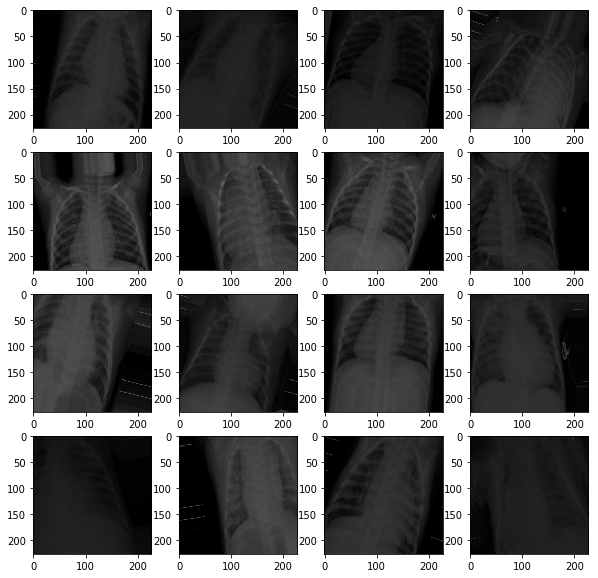

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [11]:
# Check the first 16 images from the batch

figure(figsize = (10,10))
for i in range(16):
    subplot(4,4, i+1)
    imshow(data_batch[i])
show()

# Check the last labels batch
labels_batch

# Building the models
We experimented with the effects of data augmentation and therefore ended up using augmentation to all models.

Our first model selected is a 4 convolutional layer model with a cascading filter system.  
Very deep architectures with a very large number of parameters tend to overfit the data, especially with small datasets (1). Very deep CNNs are also computationally expensive.
Therefore our second model was a very simple version based on the example in the  course material

In general, when using small datasets (<50 000 images) a pre-trained CNN should be used and finetuned with the data at hand (2). If one decides to build a model from scratch,it might be better to build a CNN that is inspired by a model thathas already proven its effectiveness for a similar task. That is why we selected one model to be a simplified modification of a CNN called AlexNet (model number 3). AlexNet is claimed to produce better results in object recognition due to it's overlapping pooling kernels, which reduces overfitting. Original AlexNet architechture has a splitted layer concept which seemed to be difficult to apply in the given timeframe. Therefore we applied a single pipeline modification of AlexNet keras implementation available online at 3.

Usually CNN's have a softmax activator in the last layer, but since this is essentially a binary classification problem (the person either has pneumonia or not), we are using sigmoid as the activation function. However, certain techniques/ alterations to the model can help to reduce overfitting.

1. Bermejo-Peláez, D.; Ash, S.Y.; Washko, G.R.; San Jose Estepar R. & Ledesma-Carbayo,M  2020. Classification of Interstitial Lung Abnormality Patterns with an Ensemble of Deep Convolutional Neural Networks. Sci Rep 10, 338 (2020).Available online at https://www.nature.com/articles/s41598-019-56989-5#Fig2

2. Altaf, Fouzia; Islam, Syed M.;Akhtar, Naveed & Janjua, Naeem 2019. Going Deep in Medical Image Analysis:Concepts, Methods, Challenges and FutureDirections. arXiv.org > cs > arXiv:1902.05655. Available online at https://arxiv.org/abs/1902.05655

3. Rizwan, Muhammad 2018. AlexNet Implementation Using Keras. Posted at engMRK website.available https://engmrk.com/alexnet-implementation-using-keras/



In [12]:
### Building the models

#variable to use to make changin the models easier
inputshape=(227,227,3)

# Build a simple convolutional neural network (CNN) - Model #1

# convolutional layers
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = inputshape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# dense layers
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
# output layer
model.add(layers.Dense(1, activation = 'sigmoid'))


# Build a simple convolutional neural network (CNN) - Model #2

# convolutional layers
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = inputshape))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
# dense layers
model2.add(layers.Dense(128, activation = 'relu'))
model2.add(layers.Dense(64, activation = 'relu'))
# output layer
model2.add(layers.Dense(1, activation = 'sigmoid'))

# Build a single layer version of AlexNet (CNN)

model3 = models.Sequential()
# convolutional layers
model3.add(layers.Conv2D(filters=96, input_shape=inputshape, kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))
model3.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model3.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))
model3.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model3.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model3.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model3.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model3.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model3.add(layers.Flatten())
# dense layers
model3.add(layers.Dense(units = 9216, activation = "relu"))
model3.add(layers.Dense(units = 4096, activation = "relu"))
model3.add(layers.Dense(4096, activation = "relu"))
# output layer
model3.add(layers.Dense(1, activation = "sigmoid")) #As we have two classes

# a variable to define metrics for easier changes
myMetrics=['acc',FalseNegatives(),FalsePositives(),SpecificityAtSensitivity(0.9)]

## compiling the models
# !! use slower learning rate than the default rate to make the optimizer update the parameters in a more subtle manner
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop (lr = 1e-4), metrics=myMetrics)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop (lr = 1e-4), metrics=myMetrics)
model3.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop (lr = 1e-4), metrics=myMetrics)

In [13]:
## Train the networks with the training and validation data

# variable to change the number of epoch easily
nEpochs=20


#Model 1 training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = None, # modifying steps_per_epoch, (steps_per_epoch = None) using all 3852 images
    verbose = 0,
    epochs = nEpochs,
    validation_data = dev_generator,
    validation_steps = None)

#Model 2 training
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = None,
    verbose = 0,
    epochs = nEpochs,
    validation_data = dev_generator,
    validation_steps = None)

#Model 3 training
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch = None,
    verbose = 0, 
    epochs = nEpochs,
    validation_data = dev_generator,
    validation_steps = None)

# Results and Discussion

With medical applications it is essential to know how well the model distinguishes between those patients who have the suspected disease and those patients who do not. Accuracy tells how
many times the application gives the right diagnosis. Usually we also want to know how correctly the application generates a positive result for people who have the condition that’s being tested for. “True positive” rate/ aka sensitivity is the proportion of truly diseased patients who are diagnosed as having the disease byt the application. An application with high sensitivity tags almost everyone who has the disease and does not generate a lot of false negatives which could lead to sick people sent home and have their treatment being delayed. <br>

It is also crucial to know how likely the application correctly generates a negative result for people who don’t have the condition. "True negative rate" aka Specificity is the proportion of truly nondiseased patients who have a negative result on the screening or diagnostic test. An unspecific application or test could lead to healthy people being subjected to unneccesary treatments.<br>

The importance of the metrics increase especially dealing with diseases or treatments with high healt risks, such as in the case of cancer.<br>

The accuracy for the test batch should be something greater than 70%, since it is the accuracy gained if the model stated everyone sick. However, the performance should not be judged only by accuracy, and therefore other metrics should be used aswell. Generally the goodness of the model can be evaluated by the means of assessing the information provided by the confusion matrix. The confusion matrix and it's information can provide us the information about both correct (True positives "TP" and true negatives"TN") and incorrect predictions (False positives "FP" and False negatives "FN"). More information can be drawan from the ratios of the beforementioned.<br>

(1) Accuracy = Correct predictions / Total predictions = (TP + TN) / (TP + TN + FP + FN)<br>
(2) Precision (positive predict value)= True positive / Predicted positive = TP / (TP + FP)<br>
(3) Recall (sensitivity) = True positive / Actual positive = TP / (TP + FN)<br>
(4) Specificity = True negative/ (False positive+ True negative) =TN/(FP+TN)<br>

A metric called specificity at sensitivity can be outputted from keras metrics. It outputs the specificity at a certain chosen sensitivity level. The sensitivity level was chosen to be high (90%). Therefore the metric in this case tells us the proportion of healthy people correctly being diagnosed healthy at performance level where 9 out of 10  people suffering from pneumonia are correctly diagnosed to have pneumonia. The lower the outcome the more people are being diagnosed to have pneumonia though they're healthy.


### Training and validation phase data visualization and analysis

In [14]:
# Create variables for history metrics for the fitted models (accuracy, loss)

#Metrics for Model 1
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
sas=history.history['specificity_at_sensitivity']
val_sas=history.history['val_specificity_at_sensitivity']
fn=history.history['false_negatives']
vfn=history.history['val_false_negatives']
fp=history.history['false_positives']
vfp=history.history['val_false_positives']
epochs = range(len(acc))

#Metrics for Model 2
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
sas2=history2.history['specificity_at_sensitivity']
val_sas2=history2.history['val_specificity_at_sensitivity']
fn2=history2.history['false_negatives']
vfn2=history2.history['val_false_negatives']
fp2=history2.history['false_positives']
vfp2=history2.history['val_false_positives']
epochs2 = range(len(acc2))

#Metrics for Model 3
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
sas3=history3.history['specificity_at_sensitivity']
val_sas3=history3.history['val_specificity_at_sensitivity']
fn3=history3.history['false_negatives']
vfn3=history3.history['val_false_negatives']
fp3=history3.history['false_positives']
vfp3=history3.history['val_false_positives']
epochs3 = range(len(acc3))

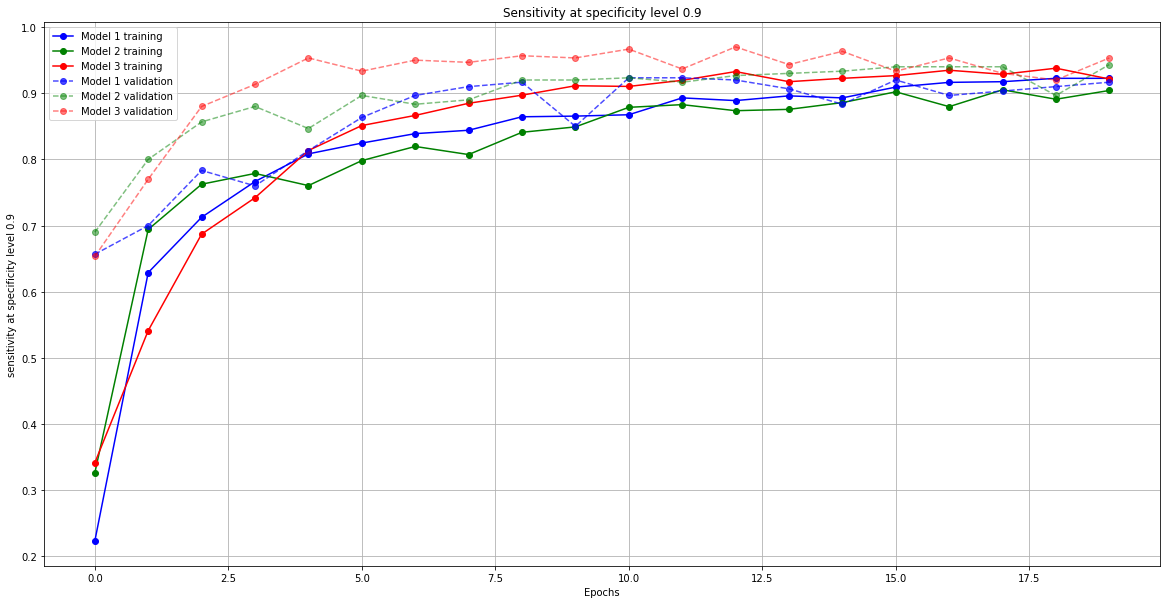

In [15]:
# Check the sensitivity at specificity level 0.9 for the training done for each model

plt.figure(figsize=(20,10))
plt.plot(epochs, sas, 'bo-', label='Model 1 training')
plt.plot(epochs2, sas2, 'go-', label='Model 2 training')
plt.plot(epochs3, sas3, 'ro-', label='Model 3 training')
plt.plot(epochs, val_sas, 'bo--', alpha=0.7, label='Model 1 validation')
plt.plot(epochs2, val_sas2, 'go--', alpha=0.5, label='Model 2 validation')
plt.plot(epochs3, val_sas3, 'ro--', alpha=0.5, label='Model 3 validation')

plt.title('Sensitivity at specificity level 0.9')
plt.xlabel('Epochs')
plt.ylabel('sensitivity at specificity level 0.9')
plt.grid()
plt.legend()

plt.show()

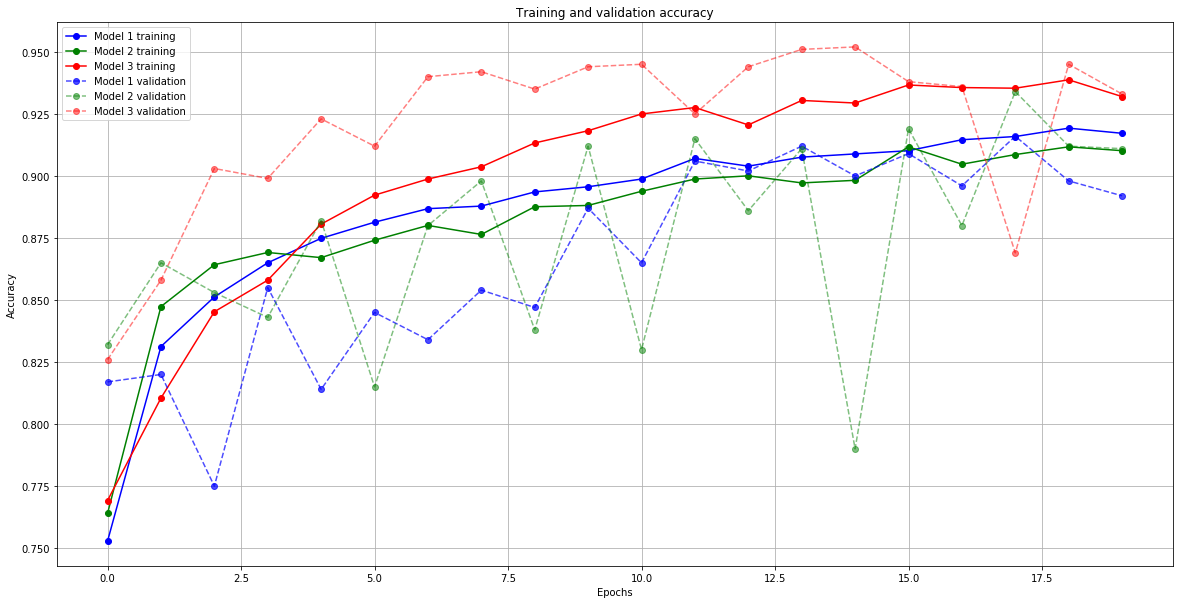

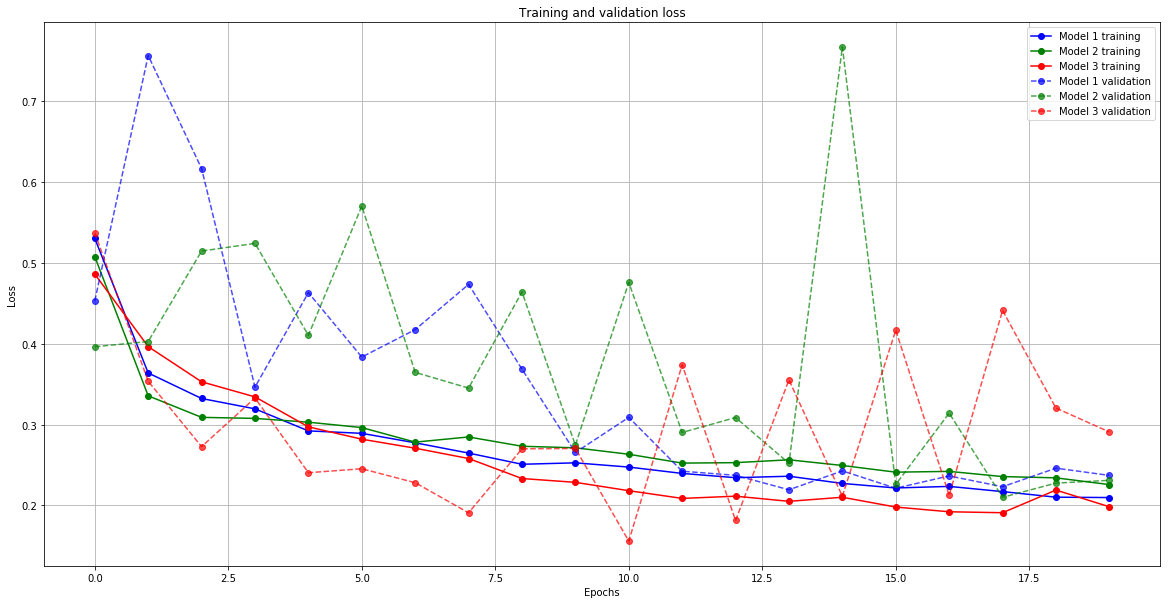

In [16]:
# Check the accuracy and loss graphs for the training done for each model

plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'bo-', label='Model 1 training')
plt.plot(epochs2, acc2, 'go-', label='Model 2 training')
plt.plot(epochs3, acc3, 'ro-', label='Model 3 training')
plt.plot(epochs, val_acc, 'bo--', alpha=0.7, label='Model 1 validation')
plt.plot(epochs2, val_acc2, 'go--', alpha=0.5, label='Model 2 validation')
plt.plot(epochs3, val_acc3, 'ro--', alpha=0.5, label='Model 3 validation')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'bo-', label='Model 1 training')
plt.plot(epochs2, loss2, 'go-', label='Model 2 training')
plt.plot(epochs3, loss3, 'ro-', label='Model 3 training')
plt.plot(epochs, val_loss, 'bo--', alpha=0.7, label='Model 1 validation')
plt.plot(epochs2, val_loss2, 'go--', alpha=0.7, label='Model 2 validation')
plt.plot(epochs3, val_loss3, 'ro--', alpha=0.7, label='Model 3 validation')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

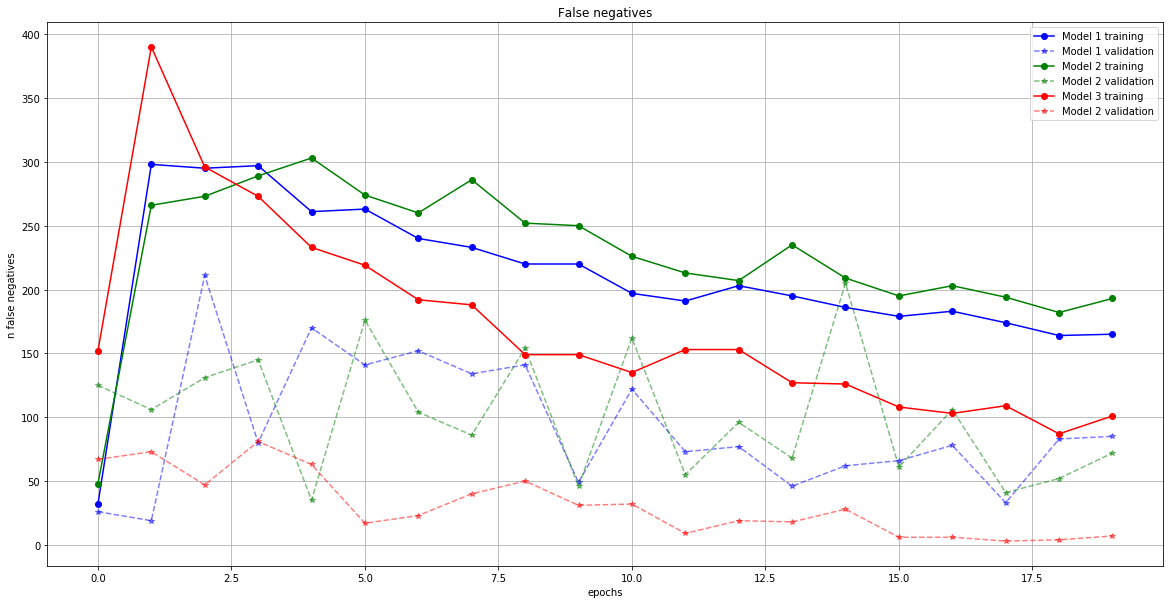

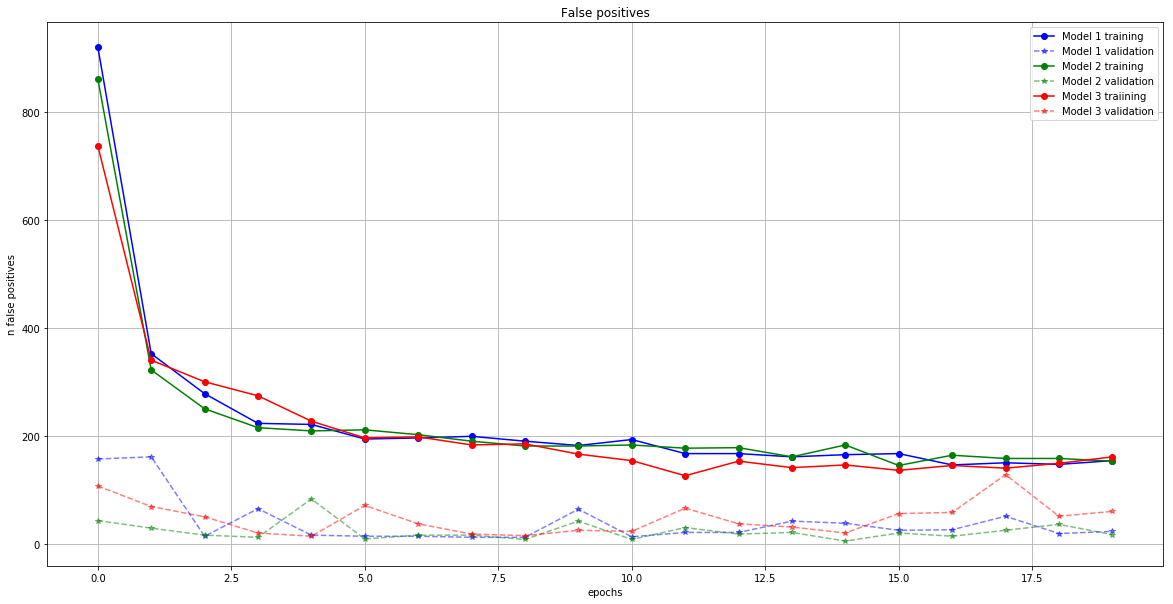

In [17]:


#Plot false negatives
plt.figure(figsize=(20,10))
plot(epochs, fn, 'bo-', label = "Model 1 training")
plot(epochs, vfn, 'b*--', alpha=0.5,  label = "Model 1 validation")
plot(epochs, fn2, 'go-', label = "Model 2 training")
plot(epochs, vfn2, 'g*--',alpha=0.5, label = "Model 2 validation")
plot(epochs, fn3, 'ro-', label = "Model 3 training")
plot(epochs, vfn3, 'r*--', alpha=0.5, label = "Model 2 validation")
plt.xlabel('epochs')
plt.ylabel('n false negatives')
title('False negatives')
grid()
legend()

#Plot false positives
plt.figure(figsize=(20,10))
plot(epochs, fp, 'bo-', label = "Model 1 training")
plot(epochs, vfp, 'b*--', alpha=0.5,  label = "Model 1 validation")
plot(epochs, fp2, 'go-', label = "Model 2 training")
plot(epochs, vfp2, 'g*--',alpha=0.5, label = "Model 2 validation")
plot(epochs, fp3, 'ro-', label = "Model 3 traiining")
plot(epochs, vfp3, 'r*--', alpha=0.5, label = "Model 3 validation")
plt.xlabel('epochs')
plt.ylabel('n false positives')
title('False positives')
grid()
legend()

show()

### Model predictions vs true labels

In [18]:
# Model predictions using validation data

# assign the labels

labels = dev_generator.classes

# predict the results for each model

predicted = model.predict_generator(dev_generator).flatten()
predicted2 = model2.predict_generator(dev_generator).flatten()
predicted3 = model3.predict_generator(dev_generator).flatten()

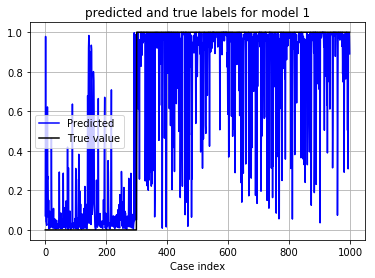

In [19]:
# Plot the predicted and true labels for model 1

plt.plot (predicted, 'b', label = 'Predicted')
plt.plot (labels, 'k', label = 'True value')
plt.legend()
plt.xlabel ('Case index')
plt.title('predicted and true labels for model 1')
plt.grid()

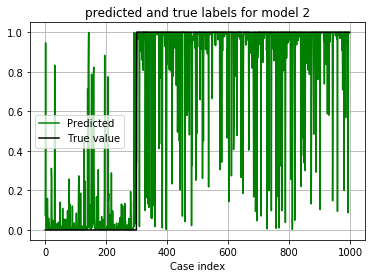

In [20]:
# Plot the predicted and true labels for model 2

plt.plot (predicted2,'g', label = 'Predicted')
plt.plot (labels,'k', label = 'True value')
plt.legend()
plt.xlabel ('Case index')
plt.title('predicted and true labels for model 2')
plt.grid()

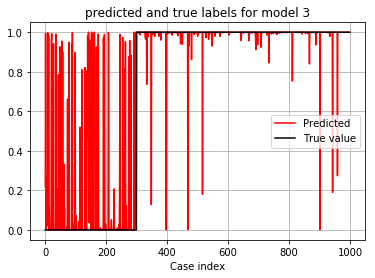

In [21]:
# Plot the predicted and true labels for model 3

plt.plot (predicted3,'r', label = 'Predicted')
plt.plot (labels,'k', label = 'True value')
plt.legend()
plt.xlabel ('Case index')
plt.title('predicted and true labels for model 3')
plt.grid()

In [22]:
# Create a confusion matrix and calculate classification report for analysis

# creation for model 1

print ('Confusion matrix (medical presentation) and classification report for model 1:\n')
tn, fp, fn, tp =  confusion_matrix(labels, predicted > 0.5).ravel()
cm= array([[tp,fn],[fp,tn]])
print(cm)

# maximum value of sensitivity at specificity of 0,9 from the validation set
maximumsas=max(val_sas)
print("\nModel 1 Highest validation sensitivity at specificity 0,9: ",maximumsas,"\n")
print("\nModel 1 validation sensitivity at specificity 0,9 at the end of training: ", val_sas,"\n")

cr = classification_report(labels, predicted > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr)


# creation for model 2
print ('\nConfusion matrix (medical presentation) and classification report for model 2:\n')
tn, fp, fn, tp =  confusion_matrix(labels, predicted2 > 0.5).ravel()
cm2= array([[tp,fn],[fp,tn]])
print(cm2)

maximumsas=max(val_sas2)
print("\nModel 2 Highest validation sensitivity at specificity 0,9: ", maximumsas,"\n")
print("\nModel 2 validation sensitivity at specificity 0,9 at the end of training: ", val_sas2,"\n")

cr2 = classification_report(labels, predicted2 > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr2)


# creation for model 3
print ('\nConfusion matrix (medical presentation) and classification report for model 3:\n')
tn, fp, fn, tp =  confusion_matrix(labels, predicted3 > 0.5).ravel()
cm3= array([[tp,fn],[fp,tn]])
print(cm3)

maximumsas=max(val_sas3)
print("\nModel 3 Highest validation sensitivity at specificity 0,9: ", maximumsas,"\n")
print("\nModel 3 validation sensitivity at specificity 0,9 at the end of training: ", val_sas3,"\n")

cr3 = classification_report(labels, predicted3 > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr3)





Confusion matrix (medical presentation) and classification report for model 1:

[[615  85]
 [ 23 277]]

Model 1 Highest validation sensitivity at specificity 0,9:  0.92333335 


Model 1 validation sensitivity at specificity 0,9 at the end of training:  [0.6566667, 0.7, 0.78333336, 0.76, 0.81333333, 0.86333334, 0.89666665, 0.91, 0.9166667, 0.85, 0.92333335, 0.92333335, 0.92, 0.9066667, 0.8833333, 0.92, 0.89666665, 0.9033333, 0.91, 0.9166667] 

               precision    recall  f1-score   support

   Normal (0)       0.77      0.92      0.84       300
Pneumonia (1)       0.96      0.88      0.92       700

     accuracy                           0.89      1000
    macro avg       0.86      0.90      0.88      1000
 weighted avg       0.90      0.89      0.89      1000


Confusion matrix (medical presentation) and classification report for model 2:

[[628  72]
 [ 17 283]]

Model 2 Highest validation sensitivity at specificity 0,9:  0.9433333 


Model 2 validation sensitivity at specific

As seen above, both accuracy and sensitivity at specificity 0,9 for model 3 are slightly better than for the other trained models.

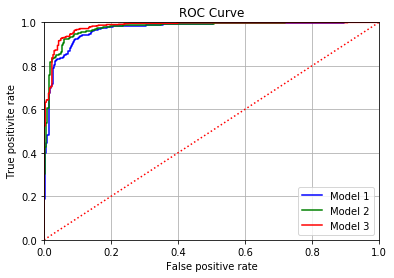

In [23]:
# Calculate the ROC curves for further analysis

fpr, tpr, thresholds = roc_curve(labels, predicted, pos_label = 1)
fpr2, tpr2, thresholds = roc_curve(labels, predicted2, pos_label = 1)
fpr3, tpr3, thresholds = roc_curve(labels, predicted3, pos_label = 1)

# Show the ROC curve plot

plt.plot (fpr, tpr,'b', label = 'Model 1')
plt.plot (fpr2, tpr2,'g', label = 'Model 2')
plt.plot (fpr3, tpr3,'r', label = 'Model 3')
plt.plot ([0, 1], [0, 1], 'r:')
plt.xlabel('False positive rate')
plt.ylabel('True positivite rate')
plt.title('ROC Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.grid()

Area under the ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and area under it represents measure of separability. It tells how much model is capable of distinguishing between classes. The area under the curve is not calculated here, but it can bee seen from the roc curve. The more space is left under the curve the better. Therefore the curve reaching closest to the top left corner is considered the best. The ROC-curve analysis suggests that model 3 slightly outperforms the other models.

### The chosen one
All of the analyzed metrics above lead to conclusion that model 3 is the best betting horse. However, for this assignment we wanted to confirm the performances of the models with unseen test data

## Results from predicting with unseen data
The results using the models to predict unseen data are shown below.

In [24]:
# Find the labels from test generator

labels_test = test_generator.classes

# Predict the results using the unseen test data

predicted_test = model.predict_generator(test_generator).flatten()
predicted_test2 = model2.predict_generator(test_generator).flatten()
predicted_test3 = model3.predict_generator(test_generator).flatten()

In [25]:
# Create a confusion matrix and calculate classification report for observations

# creation for model 1
print ('Confusion matrix (medical presentation) and classification report for model 1:\n')
tn, fp, fn, tp =  confusion_matrix(labels_test, predicted_test > 0.5).ravel()
cm= array([[tp,fn],[fp,tn]])
print(cm)
cr = classification_report(labels_test, predicted_test > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr)

# creation for model 2
print ('Confusion matrix (medical presentation) and classification report for model 2:\n')
tn, fp, fn, tp =  confusion_matrix(labels_test, predicted_test2 > 0.5).ravel()
cm2= array([[tp,fn],[fp,tn]])
print(cm2)
cr2 = classification_report(labels_test, predicted_test2 > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr2)

# creation for model 3
print ('Confusion matrix (medical presentation) and classification report for model 3:\n')
tn, fp, fn, tp =  confusion_matrix(labels_test, predicted_test3 > 0.5).ravel()
cm3= array([[tp,fn],[fp,tn]])
print(cm3)
cr3 = classification_report(labels_test, predicted_test3 > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr3)

Confusion matrix (medical presentation) and classification report for model 1:

[[622  78]
 [ 16 284]]
               precision    recall  f1-score   support

   Normal (0)       0.78      0.95      0.86       300
Pneumonia (1)       0.97      0.89      0.93       700

     accuracy                           0.91      1000
    macro avg       0.88      0.92      0.89      1000
 weighted avg       0.92      0.91      0.91      1000

Confusion matrix (medical presentation) and classification report for model 2:

[[630  70]
 [ 23 277]]
               precision    recall  f1-score   support

   Normal (0)       0.80      0.92      0.86       300
Pneumonia (1)       0.96      0.90      0.93       700

     accuracy                           0.91      1000
    macro avg       0.88      0.91      0.89      1000
 weighted avg       0.91      0.91      0.91      1000

Confusion matrix (medical presentation) and classification report for model 3:

[[693   7]
 [ 66 234]]
               precision 

The results confirm that model 3 has slightly better outcome in general

# Conclusions

As enticipated the models developed in this assignment are not very robust. Though having tested severval models with different kind of parameters we are inclined to conclude that with a dataset of this size it may not be possible to gain better results. There is not much difference in the performance of the 3 models. Anyhow, based on the classification reports, confusion matrices and the sensitivity at specificity (0,9) after the training phase we selected model number 3 to be likely the model for it's best performance. The results were confirmed after predicting unseen data.
To create the best possible version of each model and to prevent overfitting the training should be stopped automatically when training reaches a point where performance of the model doesn't improve anymore. This can be done by setting the epochs large and using keras callback method "EarlyStopping" in the fit_generator. This means that the training stops when a chosen metric to be monitored (ie. val_loss, sensitivity_at_specificity) stops improving according to a user set limit. 